In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [19]:
#m is the number of training example
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0] #shape[0] is the length of 1D array and shpae[1] does not exist
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [21]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


In [69]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


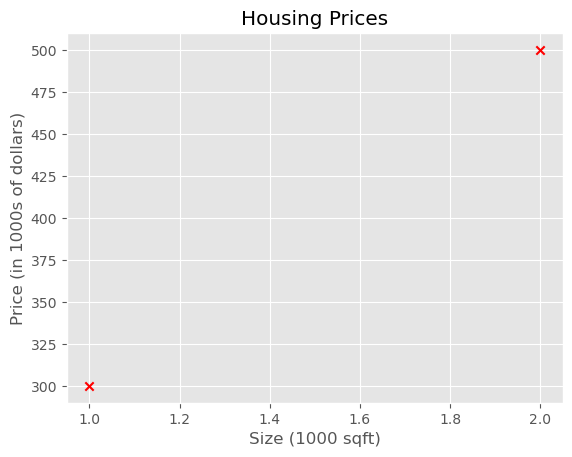

In [71]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [83]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")
# Define training data
x_train = np.array([1.0, 2.0])  # Input data (size in 1000 sqft)
y_train = np.array([300.0, 500.0])  # Target values (price in 1000s of dollars)

w: 100
b: 100


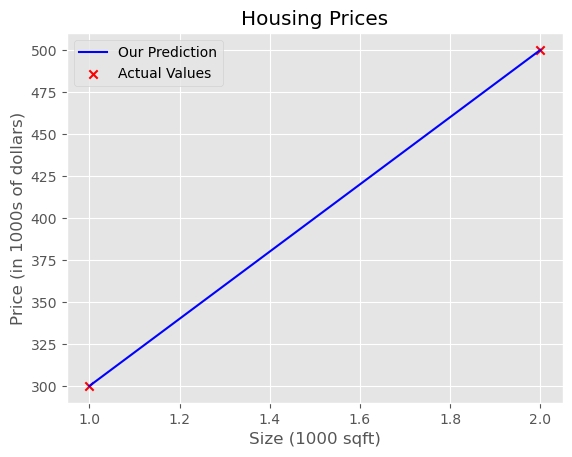

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def compute_model_output(x, w, b):
    m = x.shape[0]  # Number of training examples
    f_wb = np.zeros(m)  # Initialize array

    for i in range(m):  
        f_wb[i] = w * x[i] + b
    return f_wb  # Vectorized operation

# Define training data
x_train = np.array([1.0, 2.0])  # Input data (size in 1000 sqft)
y_train = np.array([300.0, 500.0])  # Target values (price in 1000s of dollars)

# Define model parameters
w = 200  # Weight (slope)
b = 100  # Bias (intercept)

# Compute predictions
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot the model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the actual data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set title and labels
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


In [119]:
import numpy as np
w = 200
b = 100
x_i = np.array([1.6])
cost_1200sqft = compute_model_output(x_i, w, b)
print(f"${cost_1200sqft[0]:.0f} thousand dollars")

$420 thousand dollars


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl

# Ensure this is only used in Jupyter Notebook
%matplotlib widget  

plt.style.use('./deeplearning.mplstyle')

# Training Data
x_train = np.array([1.0, 2.0])  # Size in 1000 square feet
y_train = np.array([300.0, 500.0])  # Price in 1000 dollars

# Compute Cost Function
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

ModuleNotFoundError: No module named 'lab_utils_uni'

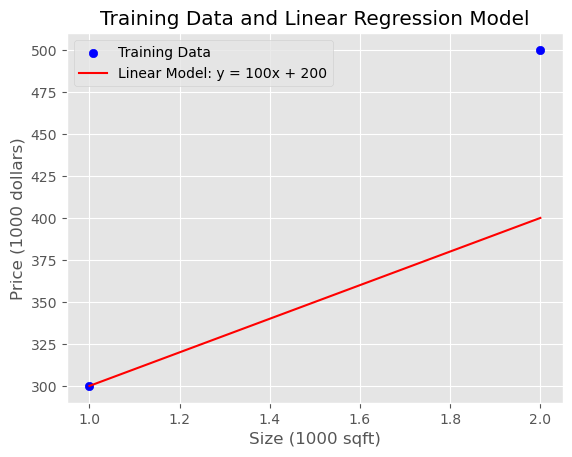

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Training Data
x_train = np.array([1.0, 2.0])  # Size in 1000 square feet
y_train = np.array([300.0, 500.0])  # Price in 1000 dollars

# Simple Linear Regression Hypothesis Function
def predict(w, b, x):
    """Linear regression model: y = w * x + b"""
    return w * x + b

# Plotting Function
def plt_intuition(x, y):
    """
    Plots the training data and the best-fit line for linear regression.
    """
    # Create a scatter plot of the training data
    plt.scatter(x, y, color='blue', label='Training Data')
    
    # Fit a linear regression line (let's use simple parameters for now)
    w, b = 100, 200  # Example weights (slope) and bias (intercept)
    y_pred = predict(w, b, x)
    
    # Plot the regression line
    plt.plot(x, y_pred, color='red', label=f'Linear Model: y = {w}x + {b}')
    
    # Labels and title
    plt.xlabel("Size (1000 sqft)")
    plt.ylabel("Price (1000 dollars)")
    plt.title("Training Data and Linear Regression Model")
    plt.legend()
    
    # Show the plot
    plt.show()

# Call the custom function to visualize
plt_intuition(x_train, y_train)


In [154]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
# Try using custom style; fallback to default if not found
try:
    plt.style.use('./deeplearning.mplstyle')
except OSError:
    print("Custom style file not found. Using default matplotlib style.")

# If lab_utils_uni is not available, comment this line out:
# from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

# Load our data set
x_train = np.array([1.0, 2.0])   # features
y_train = np.array([300.0, 500.0])   # target values

# Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0]  # number of training examples
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

# Function to compute gradients
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
        
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()
            # Example usage
w_init = 0
b_init = 0
cost = compute_cost(x_train, y_train, w_init, b_init)
grad_w, grad_b = compute_gradient(x_train, y_train, w_init, b_init)

print(f"Initial Cost: {cost}")
print(f"Gradient w: {grad_w}, Gradient b: {grad_b}")


ModuleNotFoundError: No module named 'lab_utils_uni'